# Dynamic Pricing for Airbnb – Cape Town
This project models optimal nightly rates for Airbnb listings using historical data, demand/supply signals, and predictive modeling.

## Import Libraries

In [5]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Display settings
sns.set(style="whitegrid")
#plt.style.use("seaborn-whitegrid")
%matplotlib inline
pd.set_option("display.max_columns", 100)

## Data Loading

In [12]:
# Load datasets
listings = pd.read_csv("listings.csv.gz")
calendar = pd.read_csv("calendar.csv.gz")

Shape

In [13]:
# Shape
print("Listings shape:", listings.shape)
print("Calendar shape:", calendar.shape)

Listings shape: (25882, 79)
Calendar shape: (9436819, 7)
Neighbourhoods shape: (116, 2)


Head

In [24]:
print("Listings head:")
listings.head(2)

Listings head:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20250319225355,2025-03-20,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,https://www.airbnb.com/users/show/3754,Brigitte,2008-10-21,"Cape Town, South Africa",I'm single and love to travel and meeting peop...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/3754/profile_...,https://a0.muscache.com/im/users/3754/profile_...,NaN,1.0,2.0,"['email', 'phone', 'work_email']",t,t,"Southern Suburbs, Western Cape, South Africa",Ward 57,NaN,-33.947620,18.475990,Entire home,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Refrigerator"", ""Oven"", ""Hot water"", ""Wifi"", ...",$674.00,3,730,1.0,3.0,730.0,730.0,3.0,730.0,NaN,t,14,14,14,56,2025-03-20,84,8,0,14,7,48,32352.0,2013-05-31,2025-01-08,4.81,4.82,4.69,4.96,4.95,4.77,4.8,NaN,t,1,1,0,0,0.58
1,15077,https://www.airbnb.com/rooms/15077,20250319225355,2025-03-20,city scrape,Relaxed beach living in style,Our Superior Rooms (approx. 25 m²) are located...,It is probably the best hub in order to explor...,https://a0.muscache.com/pictures/4a8fceaa-655e...,59342,https://www.airbnb.com/users/show/59342,Georg,2009-12-02,Gibraltar,challenge us please! we love to perform!,within a few hours,100%,83%,t,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,NaN,7.0,7.0,"['email', 'phone']",t,t,"Tableview - Sunset Beach, Cape Town, South Africa",Ward 4,NaN,-33.858356,18.490376,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,2.0,"[""Refrigerator"", ""Oven"", ""Hot water"", ""Books a...","$1,818.00",2,1125,2.0,6.0,1125.0,1125.0,3.7,1125.0,NaN,t,29,45,64,236,2025-03-20,7,0,0,217,0,0,0.0,2013-01-06,2022-06-16,5.00,4.86,4.86,4.86,4.71,4.86,5.0,NaN,f,6,1,5,0,0.05


In [25]:
print("Calendar head:")
calendar.head(2)

Calendar head:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3191,2025-03-20,f,$47.00,NaN,3.0,730.0
1,3191,2025-03-21,f,$47.00,NaN,3.0,730.0


Info

In [21]:
# dtypes
print("Listings head:")
listings.info()
print("Calendar head:")
calendar.info()

Listings head:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25882 entries, 0 to 25881
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25882 non-null  int64  
 1   listing_url                                   25882 non-null  object 
 2   scrape_id                                     25882 non-null  int64  
 3   last_scraped                                  25882 non-null  object 
 4   source                                        25882 non-null  object 
 5   name                                          25881 non-null  object 
 6   description                                   25585 non-null  object 
 7   neighborhood_overview                         13119 non-null  object 
 8   picture_url                                   25882 non-null  object 
 9   host_id                                       

Describe

In [27]:
print("Listings head:")
listings.describe()

Listings head:


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.588200e+04,2.588200e+04,2.588200e+04,25880.000000,25880.000000,0.0,25882.000000,25882.000000,25882.000000,21135.000000,25201.00000,21226.000000,25882.000000,2.588200e+04,25856.000000,25856.000000,2.585600e+04,2.585600e+04,25856.000000,2.585600e+04,0.0,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,2.101600e+04,20663.000000,20662.000000,20662.000000,20658.000000,20661.000000,20659.000000,20658.000000,25882.000000,25882.000000,25882.000000,25882.000000,20663.000000
mean,6.193987e+17,2.025032e+13,2.107309e+08,15.279173,21.801546,NaN,-33.955507,18.472194,3.772120,1.698368,1.90179,2.234712,4.533460,8.500156e+02,3.906018,5.480701,9.757801e+02,9.939492e+02,4.532983,9.864164e+02,NaN,11.973881,30.012171,50.390889,206.381848,24.270536,6.339696,0.639711,169.242331,5.992968,40.346573,1.041758e+05,4.750517,4.776336,4.764017,4.819457,4.824705,4.802616,4.705811,12.667491,10.711421,1.903601,0.021443,0.967318
std,5.473306e+17,7.441550e+00,2.068323e+08,43.025153,86.310864,NaN,0.098455,0.124231,2.416681,1.225152,1.44310,1.795435,21.266733,6.215715e+04,15.800817,20.899591,6.218778e+04,6.218765e+04,17.394636,6.218768e+04,NaN,10.705207,21.685593,33.069899,131.598573,47.117951,10.656020,1.231380,105.684560,10.621782,59.197990,2.159578e+05,0.445046,0.430204,0.425497,0.407910,0.414525,0.376570,0.458049,28.404449,25.886254,12.486788,0.243861,1.074962
min,3.191000e+03,2.025032e+13,3.754000e+03,0.000000,0.000000,NaN,-34.262840,18.320200,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000e+00,-1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.364584e+07,2.025032e+13,3.618844e+07,1.000000,1.000000,NaN,-34.014970,18.400300,2.000000,1.000000,1.00000,1.000000,1.000000,6.000000e+01,1.000000,2.000000,1.200000e+02,1.800000e+02,2.000000,1.800000e+02,NaN,0.000000,5.000000,15.000000,82.000000,1.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000e+00,4.690000,4.750000,4.710000,4.810000,4.830000,4.760000,4.640000,1.000000,1.000000,0.000000,0.000000,0.230000
50%,7.592885e+17,2.025032e+13,1.197750e+08,3.000000,3.000000,NaN,-33.927451,18.425365,3.000000,1.000000,1.00000,2.000000,2.000000,3.650000e+02,2.000000,3.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,NaN,11.000000,33.000000,60.000000,243.000000,6.000000,2.000000,0.000000,209.000000,1.000000,14.000000,3.456600e+04,4.880000,4.900000,4.890000,4.950000,4.970000,4.910000,4.830000,2.000000,1.000000,0.000000,0.000000,0.630000
75%,1.143203e+18,2.025032e+13,3.811219e+08,10.000000,12.000000,NaN,-33.910028,18.482308,4.000000,2.000000,2.00000,3.000000,3.000000,1.125000e+03,3.000000,5.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,21.000000,49.000000,79.000000,331.000000,25.000000,8.000000,1.000000,264.000000,7.000000,54.000000,1.154790e+05,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000

In [28]:
print("Calendar head:")
calendar.describe()

Calendar head:


,listing_id,minimum_nights,maximum_nights
count,9.436819e+06,9.436346e+06,9.436346e+06
mean,6.196653e+17,4.529360e+00,9.864879e+02
std,5.473106e+17,1.843043e+01,6.219011e+04
min,3.191000e+03,-1.000000e+00,1.000000e+00
25%,3.362629e+07,2.000000e+00,1.800000e+02
50%,7.594287e+17,2.000000e+00,3.650000e+02
75%,1.143370e+18,4.000000e+00,1.125000e+03
max,1.379872e+18,9.990000e+02,1.000000e+07


## Data health checks(Missing Values & Duplicates)

Missingness: quantify and visualize

In [36]:
# Listings
listings.isnull().sum()
listings.duplicated().sum()

np.int64(0)

In [37]:
listings.isnull().mean().sort_values(ascending=False).head(20)

,0
neighbourhood_group_cleansed,1.000000
calendar_updated,1.000000
license,0.996600
host_neighbourhood,0.995170
host_about,0.502473
neighborhood_overview,0.493123
neighbourhood,0.493123
host_location,0.255506
review_scores_checkin,0.201839
review_scores_value,0.201839


<Axes: >

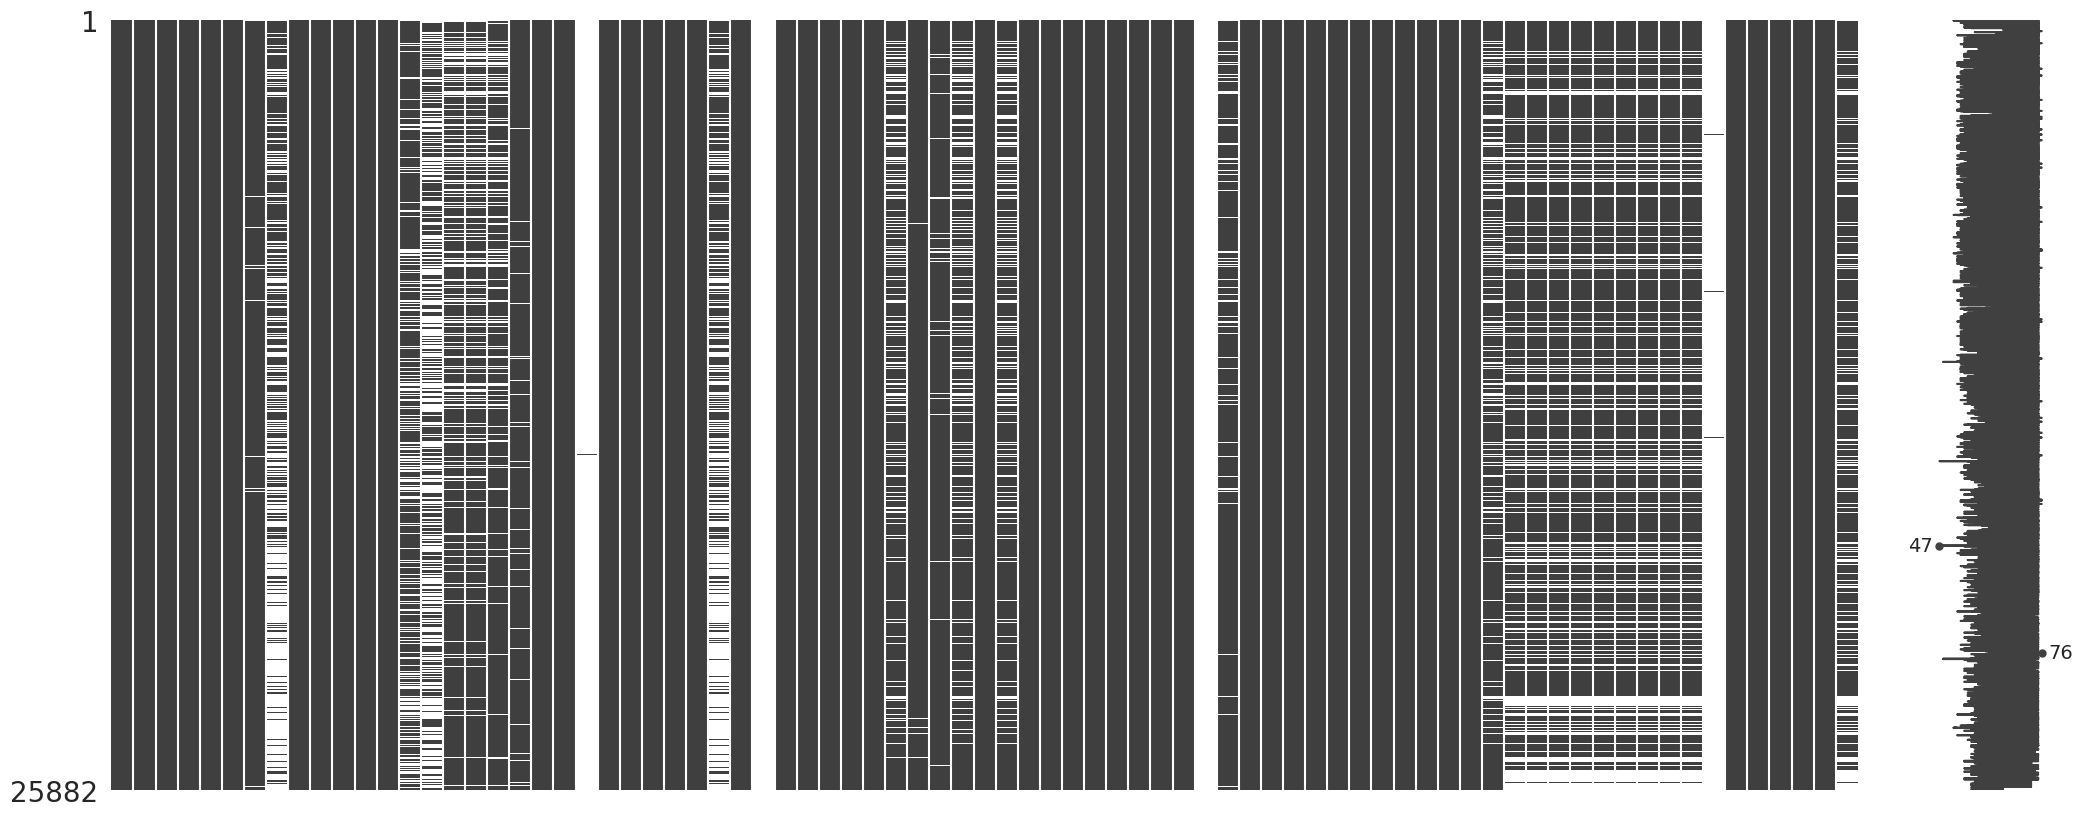

In [34]:
import missingno as msno
msno.matrix(listings)

In [38]:
# Calendar
calendar.isnull().sum()
calendar.duplicated().sum()

np.int64(0)

In [39]:
calendar.isnull().mean().sort_values(ascending=False).head(20)

,0
adjusted_price,0.997718
minimum_nights,0.000050
maximum_nights,0.000050
available,0.000000
date,0.000000
listing_id,0.000000
price,0.000000


## Data Cleaning

In [43]:
# Clean the 'price' column
if 'price' in listings.columns and listings['price'].dtype == 'object':
    # Remove '$' and ',' and convert to numeric, coercing errors to NaN
    listings['price_cleaned'] = pd.to_numeric(listings['price'].str.replace('[\$,]', '', regex=True), errors='coerce')
    # Drop rows where the cleaned price is null or zero, as they are not useful for pricing analysis
    listings.dropna(subset=['price_cleaned'], inplace=True)
    listings = listings[listings['price_cleaned'] > 0]

# Convert price from USD to ZAR (Assuming a placeholder exchange rate - UPDATE THIS!)
# You should replace 18.5 with the current USD to ZAR exchange rate
usd_to_zar_exchange_rate = 18.5
listings['price_zar'] = listings['price_cleaned'] * usd_to_zar_exchange_rate


# Display the data types and the first few rows to confirm changes
print("Data types after cleaning 'price':")
print(listings[['price', 'price_cleaned', 'price_zar']].info())
print("\nFirst 5 rows with cleaned price in USD and ZAR:")
print(listings[['price', 'price_cleaned', 'price_zar']].head())

Data types after cleaning 'price':
<class 'pandas.core.frame.DataFrame'>
Index: 21016 entries, 0 to 25881
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21016 non-null  object 
 1   price_cleaned  21016 non-null  float64
 2   price_zar      21016 non-null  float64
dtypes: float64(2), object(1)
memory usage: 656.8+ KB
None

First 5 rows with cleaned price in USD and ZAR:
       price  price_cleaned  price_zar
0    $674.00          674.0    12469.0
1  $1,818.00         1818.0    33633.0
2    $621.00          621.0    11488.5
4  $1,400.00         1400.0    25900.0
6  $7,000.00         7000.0   129500.0


In [54]:
# Convert 'date' column to datetime objects
calendar['date'] = pd.to_datetime(calendar['date'])

# Clean the 'price' column (similar to the listings dataframe)
# We will focus on the 'price' column as 'adjusted_price' might be the same in many cases
if calendar['price'].dtype == 'object':
    calendar['price_cleaned'] = pd.to_numeric(calendar['price'].str.replace('[\$,]', '', regex=True), errors='coerce')

# We are only interested in dates where the listing is available for booking
available_df = calendar[calendar['available'] == 't'].copy()
available_df.dropna(subset=['price_cleaned'], inplace=True)

# Convert price from USD to ZAR (replace 18.5 with the current USD to ZAR exchange rate)
usd_to_zar_exchange_rate = 18.5
available_df['price_zar'] = available_df['price_cleaned'] * usd_to_zar_exchange_rate

# Display the data types and the first few rows to confirm changes
print("Data types after cleaning:")
print(available_df.info())
print("\nFirst 5 rows of available listings data:")
print(available_df.head())

Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 5390583 entries, 3 to 9436818
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
 7   price_cleaned   float64       
 8   price_zar       float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 411.3+ MB
None

First 5 rows of available listings data:
    listing_id       date available   price adjusted_price  minimum_nights  \
3         3191 2025-03-23         t  $47.00            NaN             3.0   
8         3191 2025-03-28         t  $47.00            NaN             1.0   
9         3191 2025-03-29         t  $47.00            NaN             3.0   
10        3191 2025-03-30   

In [ ]:
# --- 1. Merging the DataFrames ---

# Select only the columns we need from the listings data to keep the merged dataframe lean.
columns_to_merge = [
    'id', 'property_type', 'room_type', 'neighbourhood_cleansed',
    'accommodates', 'bedrooms', 'minimum_nights', 'review_scores_rating'
]
listings_subset = listings[columns_to_merge]

# Perform the merge
# We merge on 'listing_id' from the calendar data and 'id' from the listings data.
merged_df = pd.merge(
    available_df,
    listings_subset,
    left_on='listing_id',
    right_on='id',
    how='left'
)

# Drop the redundant 'id' column from the listings data
merged_df.drop('id', axis=1, inplace=True)

print("Merge successful. Here's the head of the merged dataframe:")
print(merged_df.head())
print("\nInfo of the merged dataframe:")
merged_df.info()

In [ ]:
# Drop irrelevant columns, handle missing values
listings_clean = listings.dropna(subset=["price", "room_type", "neighbourhood"])
calendar["date"] = pd.to_datetime(calendar["date"])
calendar["price"] = calendar["price"].replace('[\$,]', '', regex=True).astype(float)

## Exploratory Data Analysis (EDA) focused on Pricing Dynamics

### Understanding Listing Characteristics and Their Price Influence

Concentrating on the `listings` dataframe to understand the inherent characteristics of the properties and their correlation with price

#### Property and Room Type

Let's analyze how the type of property and room affects the price. This will help us understand the basic pricing structure of the listings.

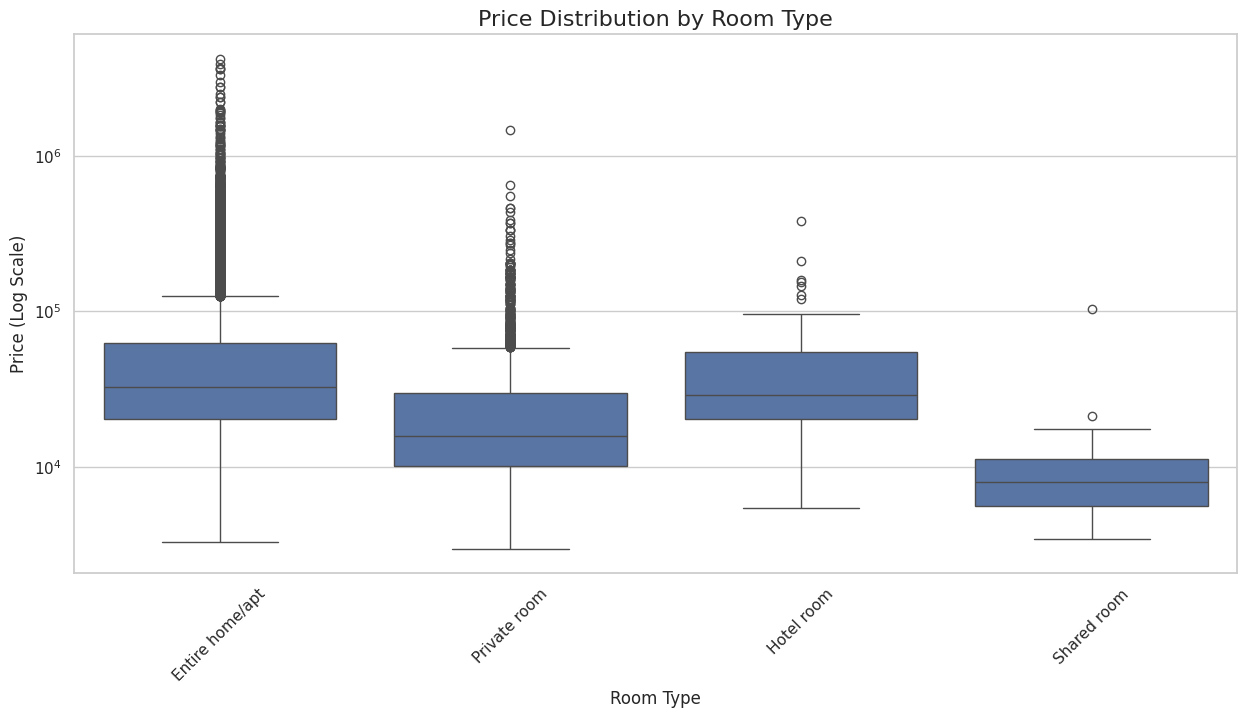

In [44]:
# Set figure size for better readability
plt.figure(figsize=(15, 7))

# Plotting Room Type vs. Price
# Boxplot is excellent for showing distribution, median, and outliers
sns.boxplot(data=listings, x='room_type', y='price_zar', order=listings['room_type'].value_counts().index)
plt.title('Price Distribution by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price (Log Scale)', fontsize=12)
plt.yscale('log') # Use a log scale due to price outliers which can skew the plot
plt.xticks(rotation=45)
plt.show()

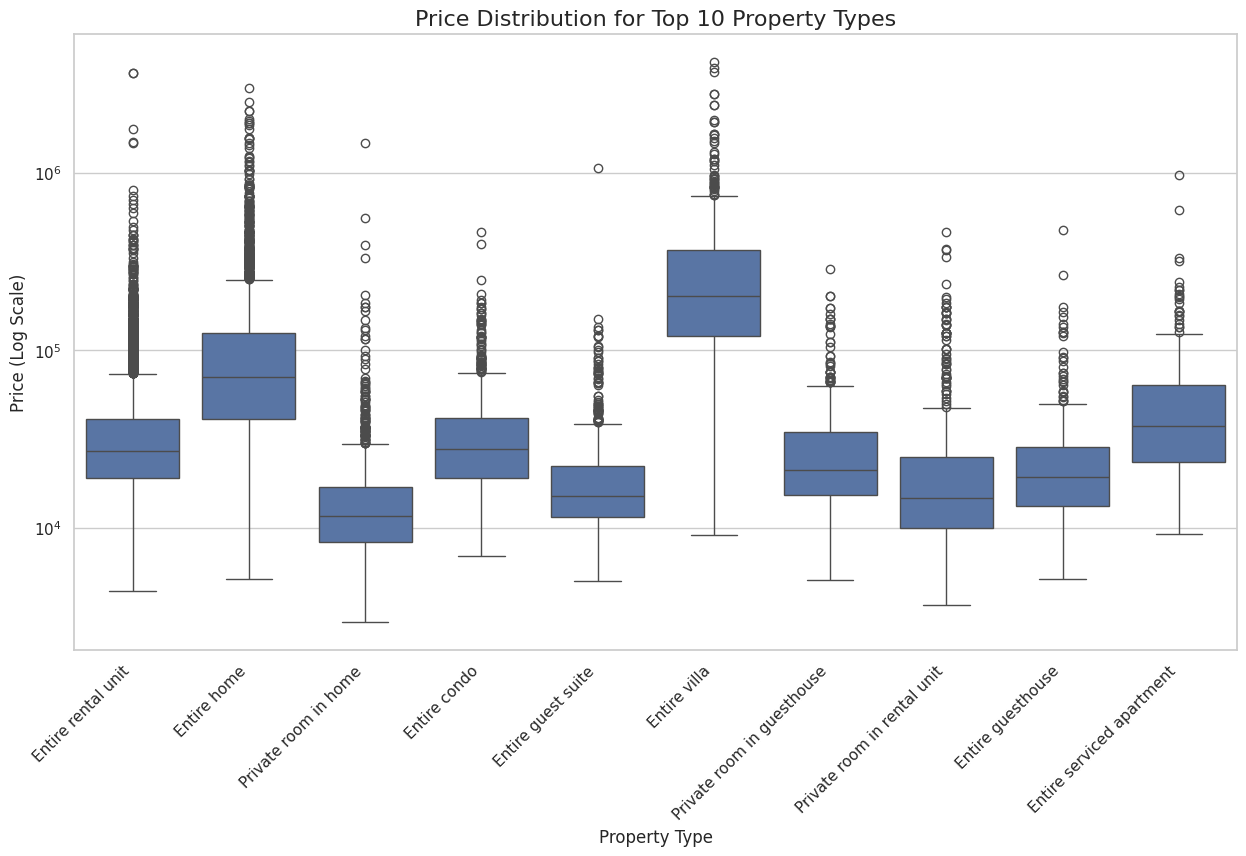

In [46]:
# --- Analysis of Property Type vs. Price ---

# To make the plot readable, we'll only look at the top 10 most common property types
top_10_property_types = listings['property_type'].value_counts().nlargest(10).index

# Filter the dataframe to include only these top property types
df_top_10_properties = listings[listings['property_type'].isin(top_10_property_types)]

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_top_10_properties, x='property_type', y='price_zar', order=top_10_property_types)
plt.title('Price Distribution for Top 10 Property Types', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Price (Log Scale)', fontsize=12)
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Accomodation Capacity

Here, we'll investigate the relationship between price and the listing's capacity, such as the number of people it accommodates, bedrooms, and beds.

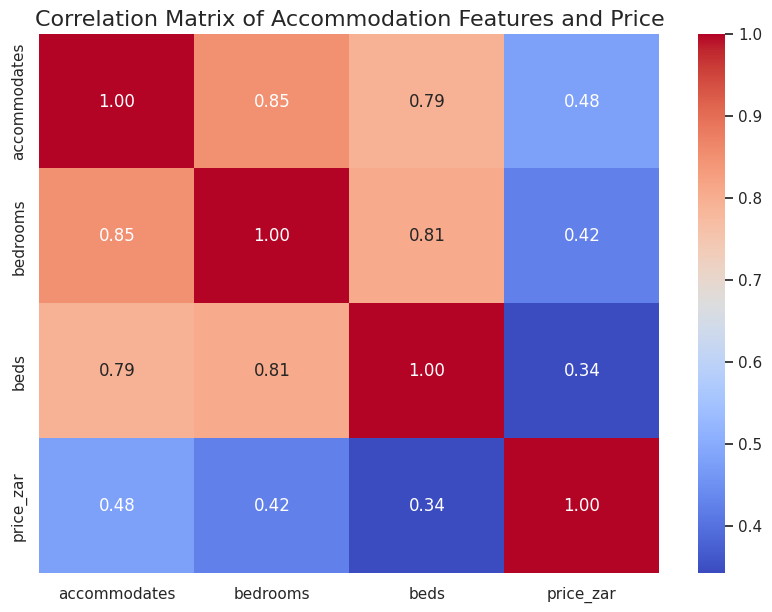

In [48]:
#Analysis of Accommodation Capacity ---

# Select the relevant numeric columns
capacity_features = ['accommodates', 'bedrooms', 'beds', 'price_zar']
capacity_df = listings[capacity_features].dropna()

# Calculate the correlation matrix
correlation_matrix = capacity_df.corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Accommodation Features and Price', fontsize=16)
plt.show()

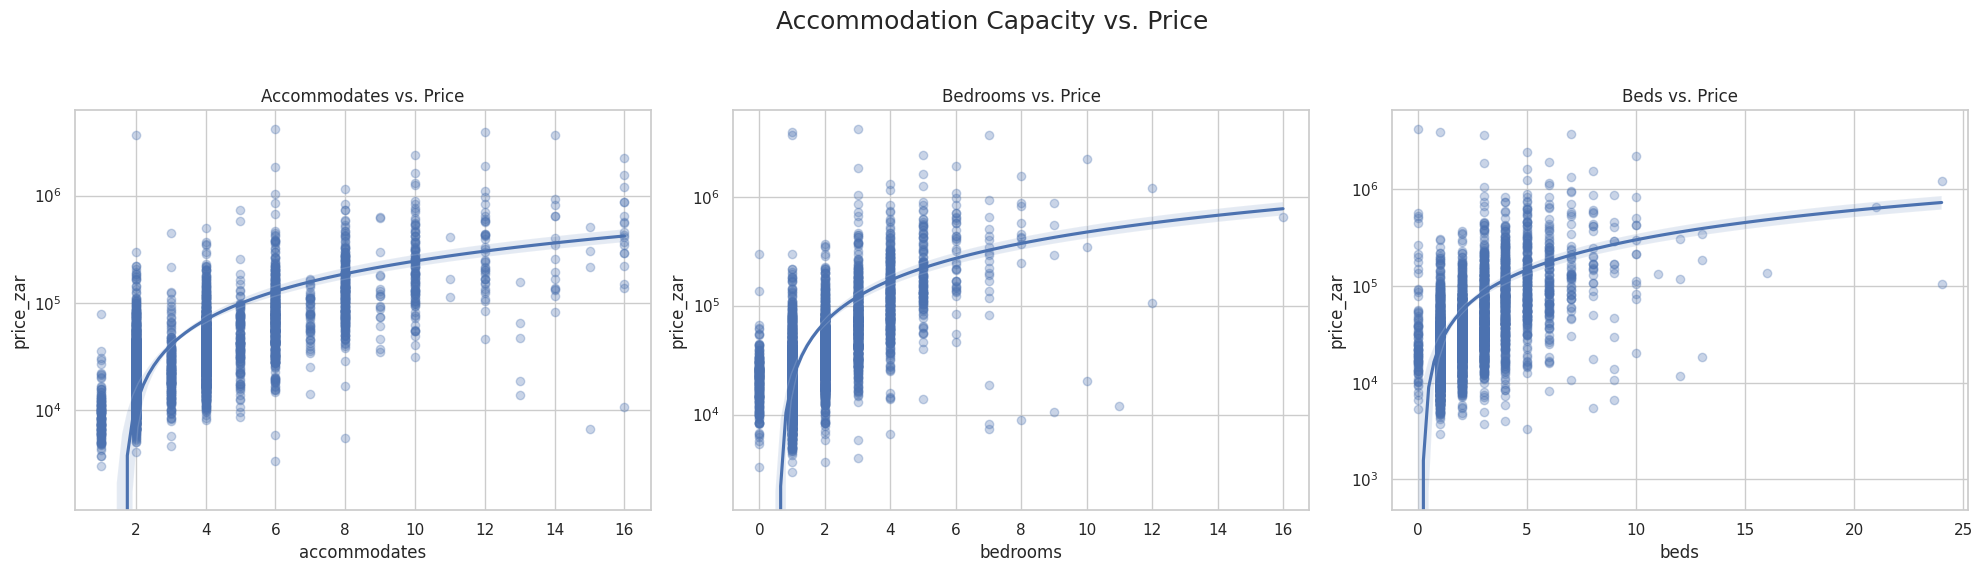

In [49]:
# Visualize the relationships with scatter plots
# Using a sample to avoid overplotting and make rendering faster
sample_df = listings.sample(n=5000, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Accommodation Capacity vs. Price', fontsize=18)

# Accommodates vs. Price
sns.regplot(ax=axes[0], data=sample_df, x='accommodates', y='price_zar', scatter_kws={'alpha':0.3})
axes[0].set_title('Accommodates vs. Price')
axes[0].set_yscale('log')

# Bedrooms vs. Price
sns.regplot(ax=axes[1], data=sample_df, x='bedrooms', y='price_zar', scatter_kws={'alpha':0.3})
axes[1].set_title('Bedrooms vs. Price')
axes[1].set_yscale('log')

# Beds vs. Price
sns.regplot(ax=axes[2], data=sample_df, x='beds', y='price_zar', scatter_kws={'alpha':0.3})
axes[2].set_title('Beds vs. Price')
axes[2].set_yscale('log')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Amenities

#### Geospatial Analysis

This analysis helps visualize where the listings are located and how price varies by neighborhood, allowing you to identify premium areas.

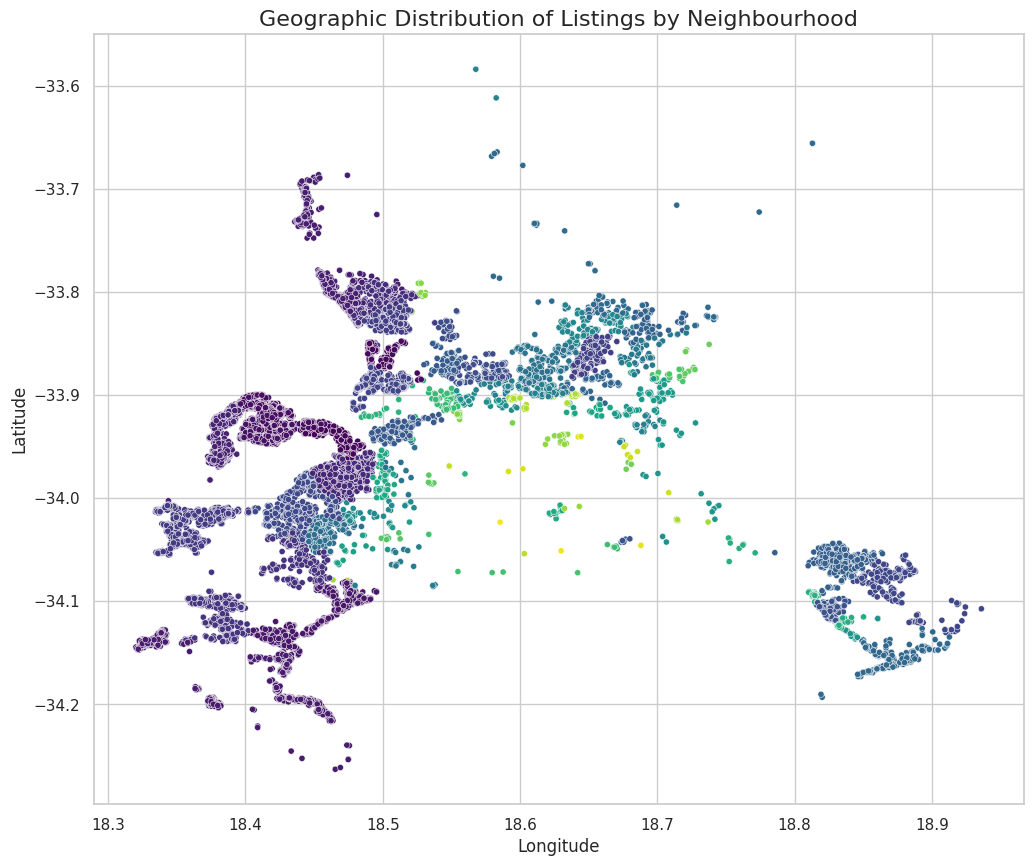

In [50]:
plt.figure(figsize=(12, 10))

# Create a scatter plot using longitude and latitude
# We will color-code the dots by neighborhood to see their distribution
sns.scatterplot(
    data=listings,
    x='longitude',
    y='latitude',
    hue='neighbourhood_cleansed',
    palette='viridis', # A color-friendly palette
    s=20, # size of the points
    legend=False # Hide the legend as there are too many neighborhoods
)

plt.title('Geographic Distribution of Listings by Neighbourhood', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

Price-based Geospacial Analysis; visualize price hotspots

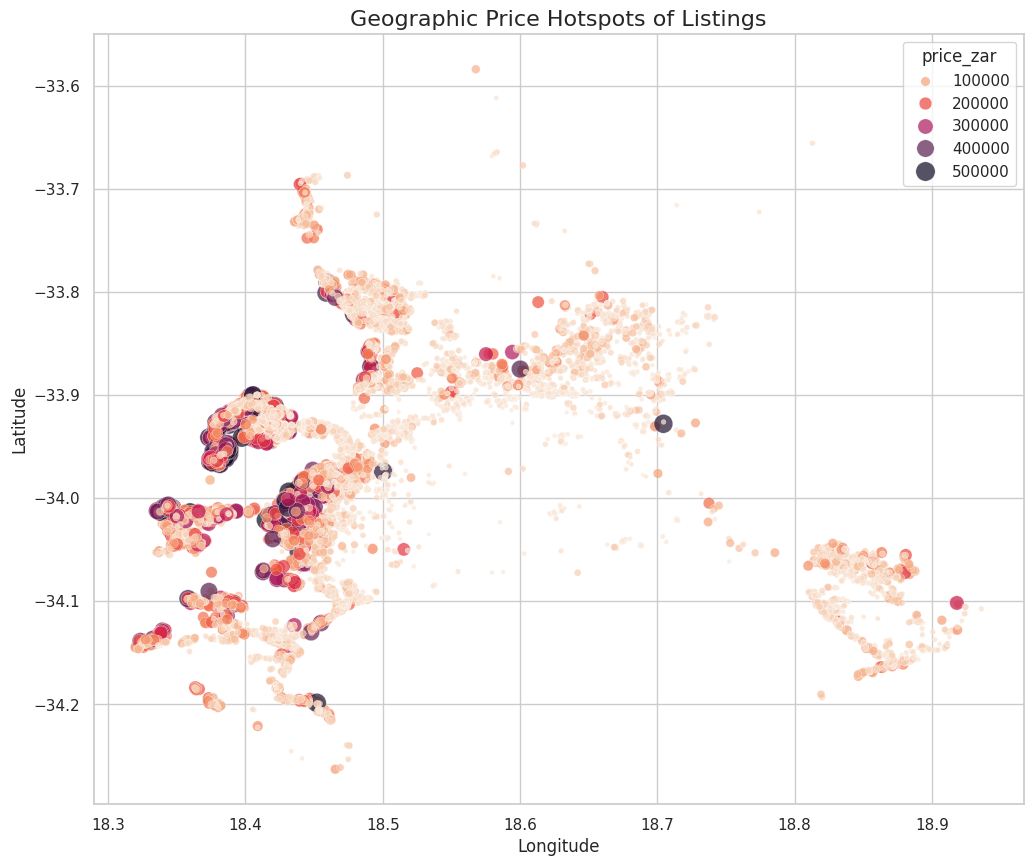

In [51]:
price_cap = listings['price_zar'].quantile(0.99)
df_price_capped = listings[listings['price_zar'] < price_cap]

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_price_capped,
    x='longitude',
    y='latitude',
    hue='price_zar',
    palette='rocket_r', # A palette where darker means more expensive
    size='price_zar', # Also vary point size by price
    sizes=(10, 200),
    alpha=0.7,
    legend='auto'
)

plt.title('Geographic Price Hotspots of Listings', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

#### Host-Specific Factors

 Finaly for Property and Room Type, let's examine if host-level metrics, like being a "Superhost," correlate with higher prices. This can help determine if host reputation has a pricing power.

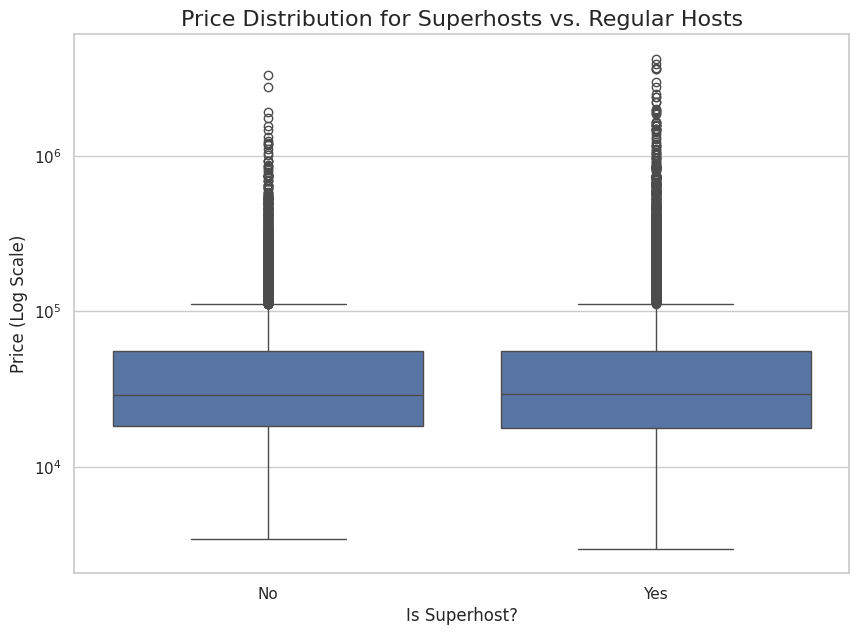

In [52]:
# --- 5. Analysis of Host-Specific Factors ---

# Superhost Status vs. Price
plt.figure(figsize=(10, 7))
sns.boxplot(data=listings, x='host_is_superhost', y='price_zar')
plt.title('Price Distribution for Superhosts vs. Regular Hosts', fontsize=16)
plt.xlabel('Is Superhost?', fontsize=12)
plt.ylabel('Price (Log Scale)', fontsize=12)
plt.yscale('log')
# Create more readable labels for the x-axis
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

### Analyzing Temporal Pricing Patterns with Calendar Data

In this part of the analysis, we'll use `calender.csv` dataset to uncover how price fluctuate over time due to seasonality, day of the week, and booking availability

#### 1. Seasonality and Yearly Trends

In [ ]:
# Calculate the average price for each date across all listings
avg_price_by_date = available_df.groupby('date')['price_zar'].mean().reset_index()

# Plot the average price over time
plt.figure(figsize=(18, 8))
plt.plot(avg_price_by_date['date'], avg_price_by_date['price_zar'])
plt.title('Average Daily Price of Airbnb Listings Over the Year', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# To get a smoother trend, we can use a rolling average (e.g., 30-day moving average)
avg_price_by_date['30_day_avg'] = avg_price_by_date['price_zar'].rolling(window=30).mean()

plt.figure(figsize=(18, 8))
plt.plot(avg_price_by_date['date'], avg_price_by_date['30_day_avg'])
plt.title('30-Day Moving Average of Daily Airbnb Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True)
plt.show()

#### 2. Weekly Patterns (Day-of-Week Effect)

In [ ]:
# Extract the day of the week from the 'date' column (Monday=0, Sunday=6)
available_df['day_of_week'] = available_df['date'].dt.dayofweek
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
available_df['day_name'] = available_df['day_of_week'].map(day_names)

# Define the order for plotting the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting Day of Week vs. Price
plt.figure(figsize=(12, 7))
sns.boxplot(data=available_df, x='day_name', y='price_zar', order=day_order)
plt.title('Price Distribution by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
# Using a log scale is not ideal here as it can obscure the smaller, but significant, weekend price bumps.
# Instead, we'll cap the y-axis to remove extreme outliers for better visualization.
plt.ylim(0, available_df['price_zar'].quantile(0.95)) # Show up to the 95th percentile
plt.show()

#### 3. Availability and Occupancy Rate Analysis

In [ ]:
# Calculate the total number of listings available each day
availability_by_date = calendar.groupby('date')['available'].apply(lambda x: (x == 't').sum()).reset_index(name='available_listings')

# Calculate the total number of unique listings in the dataset
total_listings_count = calendar['listing_id'].nunique()

# Calculate the occupancy rate for each day
availability_by_date['occupancy_rate'] = 1 - (availability_by_date['available_listings'] / total_listings_count)

# Merge occupancy data with the average price data
price_and_occupancy = pd.merge(avg_price_by_date, availability_by_date, on='date')

# --- Visualize the relationship ---

fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Average Price on the primary y-axis (left)
color = 'tab:blue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Average Price ($)', color=color, fontsize=12)
ax1.plot(price_and_occupancy['date'], price_and_occupancy['price_zar'], color=color, label='Average Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis (right) for Occupancy Rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Occupancy Rate (%)', color=color, fontsize=12)
ax2.plot(price_and_occupancy['date'], price_and_occupancy['occupancy_rate'] * 100, color=color, linestyle='--', label='Occupancy Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Average Price vs. Occupancy Rate Over Time', fontsize=16)
fig.tight_layout()
plt.show()

### Merging Listings and Calendar Data for Deeper Insights

In [55]:
# --- 1. Merging the DataFrames ---

# Select only the columns we need from the listings data to keep the merged dataframe lean.
columns_to_merge = [
    'id', 'property_type', 'room_type', 'neighbourhood_cleansed',
    'accommodates', 'bedrooms', 'minimum_nights', 'review_scores_rating'
]
listings_subset = listings[columns_to_merge]

# Perform the merge
# We merge on 'listing_id' from the calendar data and 'id' from the listings data.
merged_df = pd.merge(
    available_df,
    listings_subset,
    left_on='listing_id',
    right_on='id',
    how='left'
)

# Drop the redundant 'id' column from the listings data
merged_df.drop('id', axis=1, inplace=True)

print("Merge successful. Here's the head of the merged dataframe:")
print(merged_df.head())
print("\nInfo of the merged dataframe:")
merged_df.info()

Merge successful. Here's the head of the merged dataframe:
   listing_id       date available   price adjusted_price  minimum_nights_x  \
0        3191 2025-03-23         t  $47.00            NaN               3.0   
1        3191 2025-03-28         t  $47.00            NaN               1.0   
2        3191 2025-03-29         t  $47.00            NaN               3.0   
3        3191 2025-03-30         t  $47.00            NaN               3.0   
4        3191 2025-03-31         t  $47.00            NaN               3.0   

   maximum_nights  price_cleaned  price_zar property_type        room_type  \
0           730.0           47.0      869.5   Entire home  Entire home/apt   
1           730.0           47.0      869.5   Entire home  Entire home/apt   
2           730.0           47.0      869.5   Entire home  Entire home/apt   
3           730.0           47.0      869.5   Entire home  Entire home/apt   
4           730.0           47.0      869.5   Entire home  Entire home/apt  

#### 1. Comparing Pricing Strategies by Property Type Over Time

Does a "Private room" have the same seasonal price fluctuations as an "Entire apartment"? This analysis will show how different segments of the market adjust their prices throughout the year.

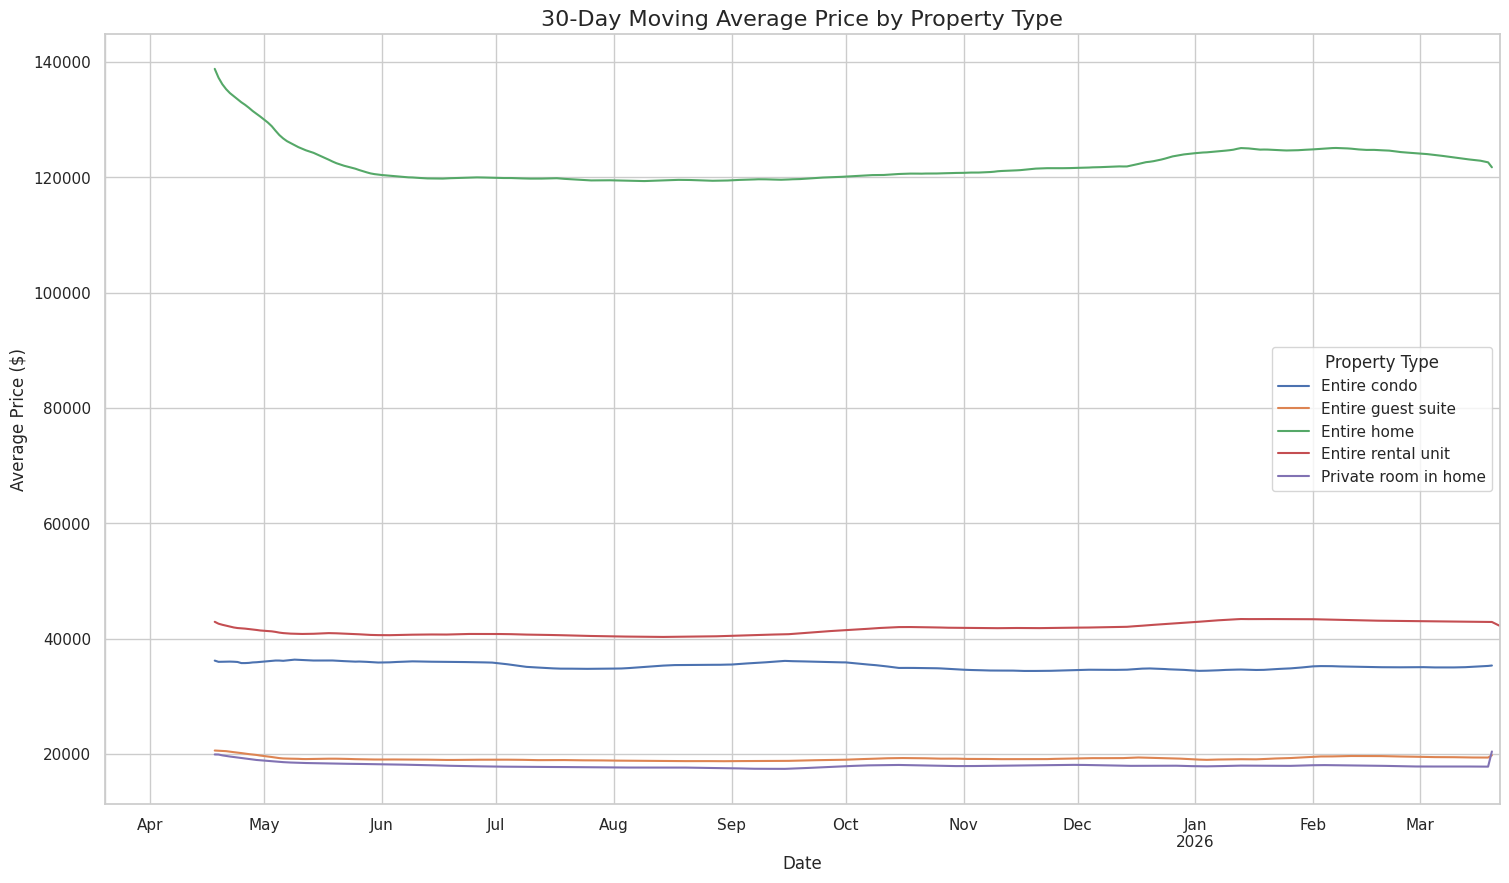

In [57]:
# --- 2. Temporal Pricing Analysis by Property Type ---

# For a clearer plot, let's focus on the most common property types.
# First, find the top 5 most common property types in the merged dataset.
top_5_property_types = merged_df['property_type'].value_counts().nlargest(5).index

# Filter the merged dataframe to only include these top property types.
df_top_5 = merged_df[merged_df['property_type'].isin(top_5_property_types)]

# Group by date and property type, then calculate the mean price.
# The unstack() method pivots the 'property_type' to become columns.
avg_price_by_type_and_date = df_top_5.groupby(['date', 'property_type'])['price_zar'].mean().unstack()

# To make trends smoother and more interpretable, apply a 30-day rolling average.
smoothed_prices = avg_price_by_type_and_date.rolling(window=30).mean()

# Plotting the results
smoothed_prices.plot(figsize=(18, 10))
plt.title('30-Day Moving Average Price by Property Type', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.legend(title='Property Type')
plt.grid(True)
plt.show()

#### 2. Analyzing Price Fluctuations in Top Neighborhoods

A dynamic pricing engine must be location-aware. Let's examine if high-demand neighborhoods have more volatile pricing and if their peak seasons differ from other areas.

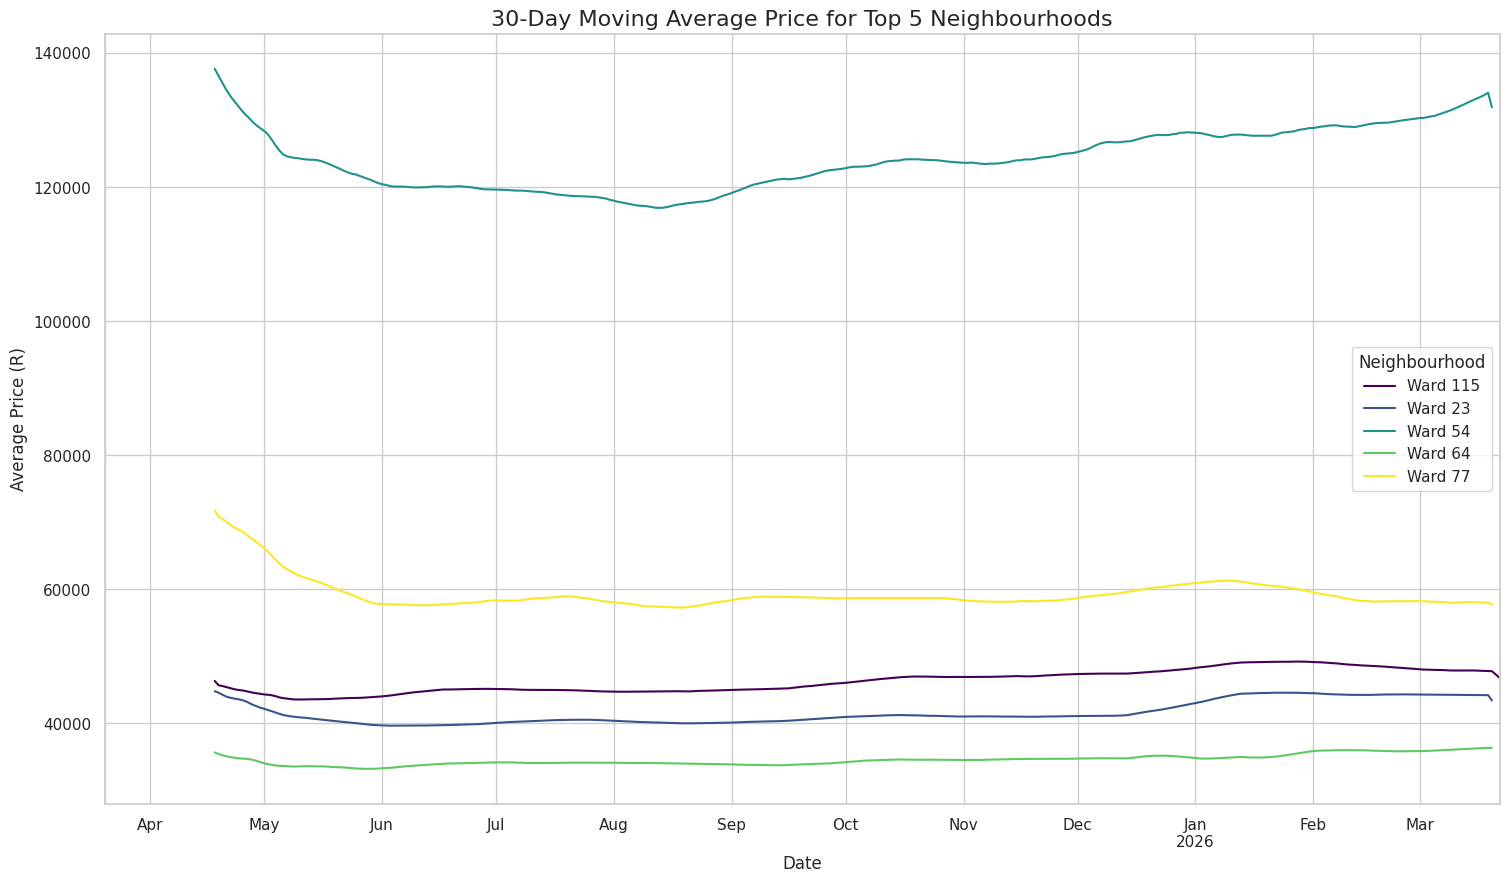

In [58]:
# --- 3. Temporal Pricing Analysis by Neighbourhood ---

# Find the top 5 neighborhoods with the most listings available.
top_5_neighbourhoods = merged_df['neighbourhood_cleansed'].value_counts().nlargest(5).index

# Filter the dataframe for these neighborhoods.
df_top_5_hoods = merged_df[merged_df['neighbourhood_cleansed'].isin(top_5_neighbourhoods)]

# Group by date and neighborhood, then find the mean price.
avg_price_by_hood_and_date = df_top_5_hoods.groupby(['date', 'neighbourhood_cleansed'])['price_zar'].mean().unstack()

# Apply a 30-day rolling average for a smoother plot.
smoothed_hood_prices = avg_price_by_hood_and_date.rolling(window=30).mean()

# Plotting the results
smoothed_hood_prices.plot(figsize=(18, 10), colormap='viridis')
plt.title('30-Day Moving Average Price for Top 5 Neighbourhoods', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price (R)', fontsize=12)
plt.legend(title='Neighbourhood')
plt.grid(True)
plt.show()

#### 3. Impact of Minimum Night Stays on Price

Hosts use minimum_nights as a tool to manage bookings. Does a longer minimum stay requirement correlate with a different daily price? This can help in recommending optimal stay restrictions.

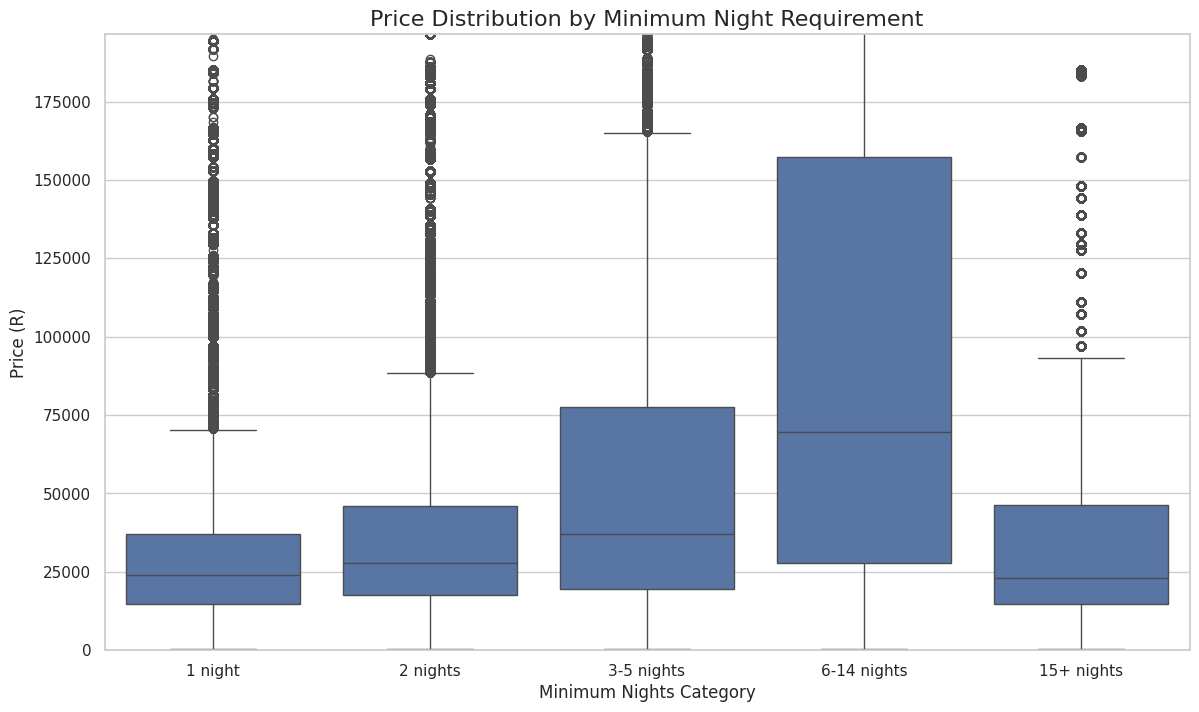

In [60]:
# --- 4. Analysis of Minimum Nights on Price ---

# The 'minimum_nights' from the calendar file can change daily (e.g., for holidays).
# Let's use the host's default 'minimum_nights' from the listings file for this analysis.

# It's difficult to analyze every single minimum night value (1, 2, 3, 4, etc.).
# A better approach is to bin them into categories.
def categorize_min_nights(nights):
    if nights == 1:
        return '1 night'
    elif nights == 2:
        return '2 nights'
    elif nights >= 3 and nights <= 5:
        return '3-5 nights'
    elif nights >= 6 and nights <= 14:
        return '6-14 nights'
    else:
        return '15+ nights'

# Apply this function to create a new column in our merged dataframe.
# We'll drop rows where minimum_nights is null.
merged_df.dropna(subset=['minimum_nights_x'], inplace=True)
merged_df['min_nights_category'] = merged_df['minimum_nights_x'].apply(categorize_min_nights)

# Define the order for a logical plot
category_order = ['1 night', '2 nights', '3-5 nights', '6-14 nights', '15+ nights']

# Plot the price distribution for each category.
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_df, x='min_nights_category', y='price_zar', order=category_order)
plt.title('Price Distribution by Minimum Night Requirement', fontsize=16)
plt.xlabel('Minimum Nights Category', fontsize=12)
plt.ylabel('Price (R)', fontsize=12)
# Cap the y-axis to prevent extreme outliers from skewing the view.
plt.ylim(0, merged_df['price_zar'].quantile(0.95))
plt.show()

## Feature Engineering

In [ ]:
# Booking lead time
calendar["lead_time"] = (calendar["date"] - pd.to_datetime("today")).dt.days

# Host type
listings_clean["multi_listing_host"] = listings_clean["host_listings_count"] > 1

# Seasonality
calendar["month"] = calendar["date"].dt.month

## Modeling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Merge calendar with listings
merged = calendar.merge(listings_clean, on="listing_id")

# Select features
features = merged[["lead_time", "month", "room_type", "neighbourhood_cleansed", "multi_listing_host"]]
features = pd.get_dummies(features)
target = merged["price"]

# Train model
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

## Simulation & Adjustment

In [ ]:
# Apply demand/supply multipliers
def adjust_price(base, demand_mult, supply_mult, d_thresh=0.8, s_thresh=0.9):
    return base * max(demand_mult, d_thresh) * max(supply_mult, s_thresh)

# Example simulation
adjusted = adjust_price(base=1200, demand_mult=1.2, supply_mult=0.85)

## Visualization

In [ ]:
# Compare original vs. adjusted prices
plt.plot([1200, adjusted], marker='o')
plt.xticks([0, 1], ["Original", "Adjusted"])
plt.title("Price Adjustment Simulation")

## Conclusion & Next Steps

In [ ]:
# Summary
- Modeled dynamic pricing using historical and contextual features
- Simulated price adjustments based on demand/supply
- Future work: integrate review sentiment, event calendars, and real-time APIs